<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%A6%D0%B5%D0%BD%D1%82%D1%80_%D1%84%D0%B8%D0%B3%D1%83%D1%80%D1%8B_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center;"><b>Центр фигуры OpenCV</b></h1>

<h1 style = "text-align: center;"> <b> Center of the OpenCV shape </b> </h1>

В этом уроке мы узнаем, как вычислить центр фигуры.
Для достижения этой целей нам потребуется выполнить небольшую предварительную обработку изображения, в том числе:

* Преобразование в оттенки серого.
* Размытие для уменьшения высокочастотного шума и повышения точности определения контуров.
* Бинаризация изображения. Обычно для этого процесса используются обнаружение края и пороговое значение. В этом посте мы будем применять пороговое значение.


### Download the code zip file

Загрузка файлов

In [1]:
!wget http://dataudt.ru/datasets/cv/Lesson_24.center_of_contour.zip
!unzip -qq Lesson_24.center_of_contour.zip
%cd /content/Lesson_24.center_of_contour/

--2022-02-02 18:38:16--  http://dataudt.ru/datasets/cv/Lesson_24.center_of_contour.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9561 (9.3K) [application/zip]
Saving to: ‘Lesson_24.center_of_contour.zip’

Lesson_24.center_of 100%[===================>]   9.34K  --.-KB/s    in 0s      

2022-02-02 18:38:17 (170 MB/s) - ‘Lesson_24.center_of_contour.zip’ saved [9561/9561]

/content/Lesson_24.center_of_contour


## Blog Post Code

Основной блок кода

### Import Packages

Импорт библиотек

In [2]:
# import the necessary packages
# импортируем необходимые библиотеки
from matplotlib import pyplot as plt
import imutils
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

Функция отображения изображений в Jupyter Notebooks и Google Colab

In [3]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
    # конвертируем изображение из формата BGR в RGB и отображаем его
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.figure(figsize=(10,10))
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### OpenCV center of contour

Центр контура OpenCV

In [4]:
# construct the argument parser and parse the arguments
# создаем парсер аргументов  и начинаем их собирать
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
# 	help="path to the input image")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
# пока мы используем Jupyter Notebooks мы можем заменить наш парсер
# явными аргументами и значениями
args = {
	"image": "fig.png"
}

In [6]:
# load the image, convert it to grayscale, blur it slightly,
# and threshold it
# загружаем изображение, конвертируем его в оттенки серого, слегка размываем
# и ограничиваем его
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

In [7]:
# find contours in the thresholded image
# находим контуры на изображении
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

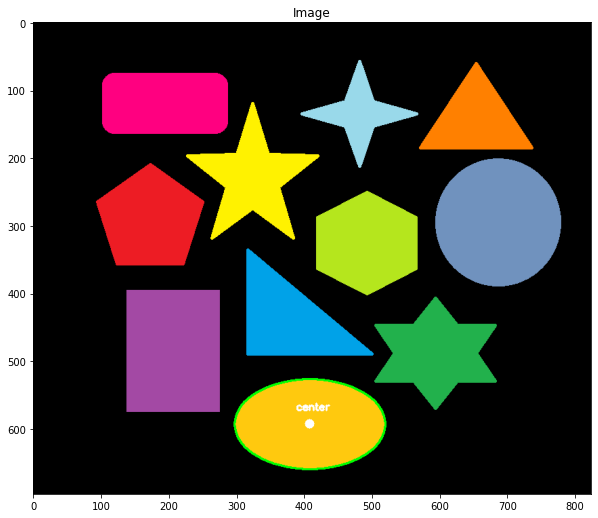

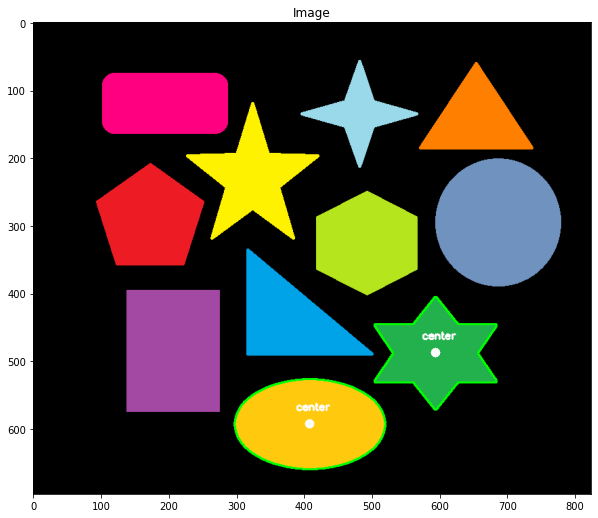

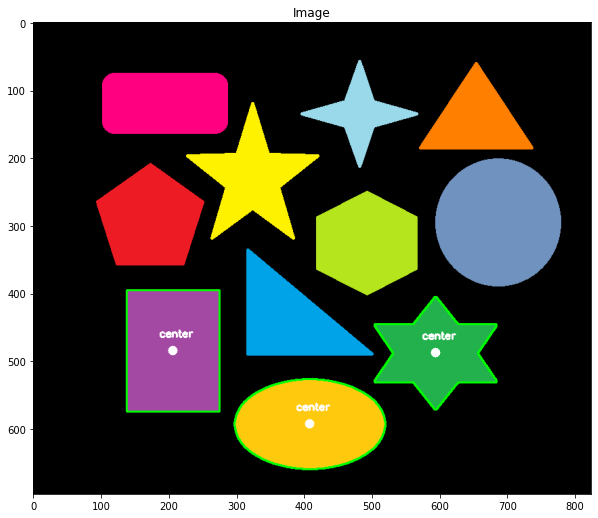

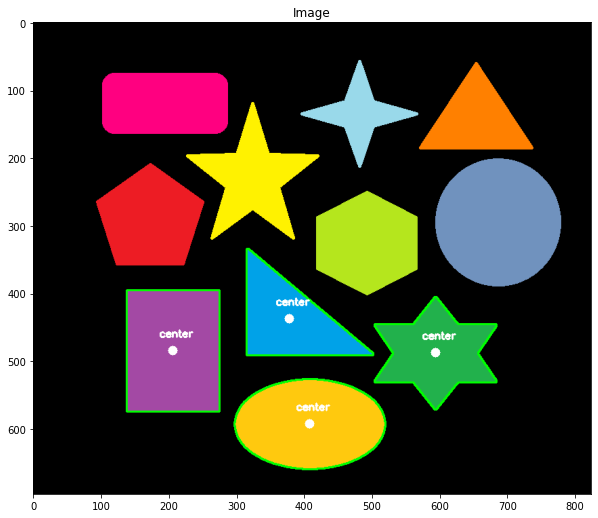

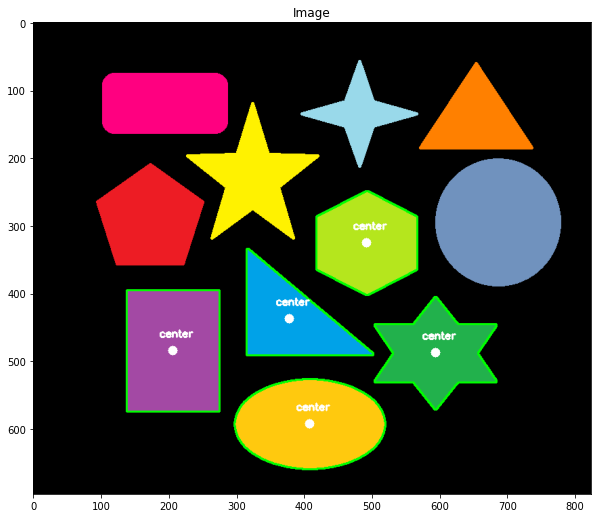

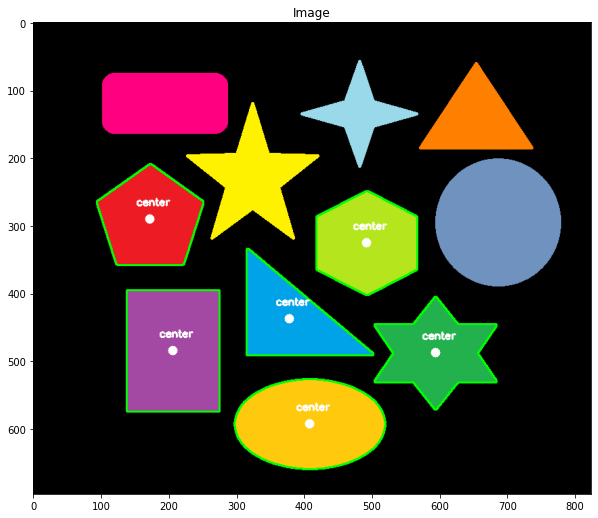

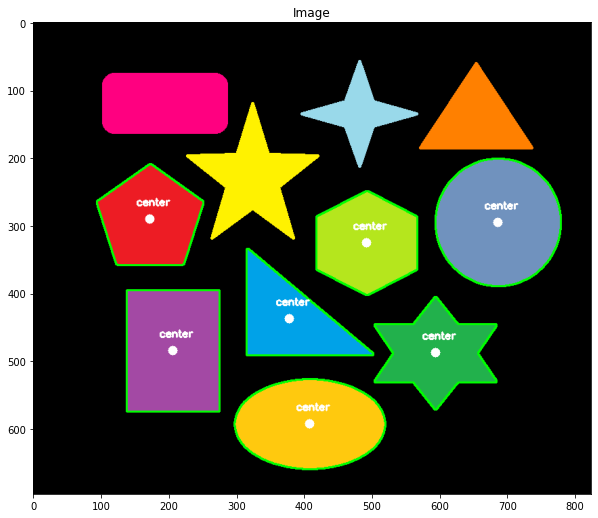

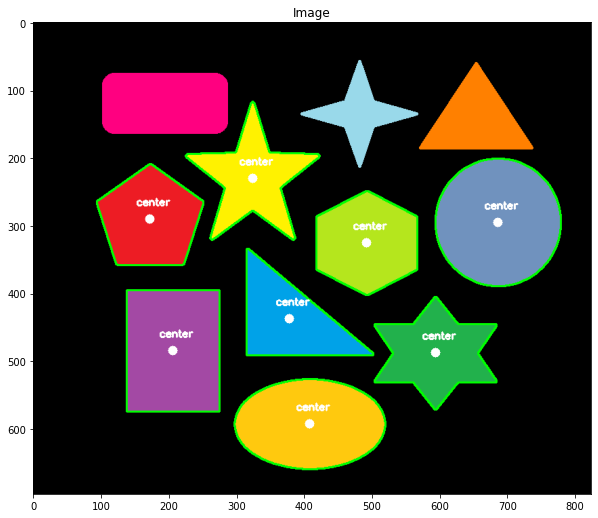

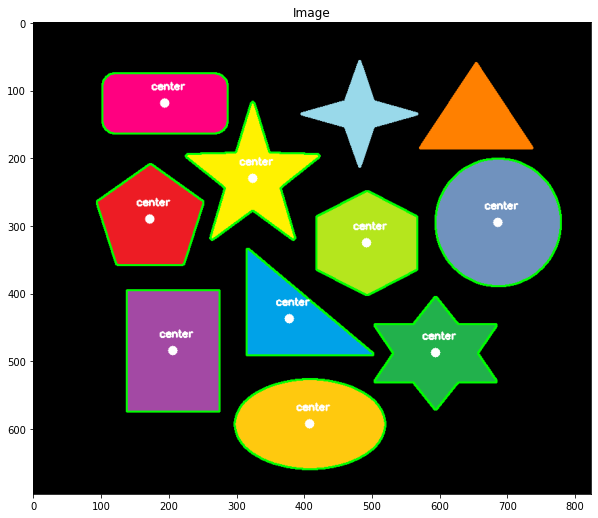

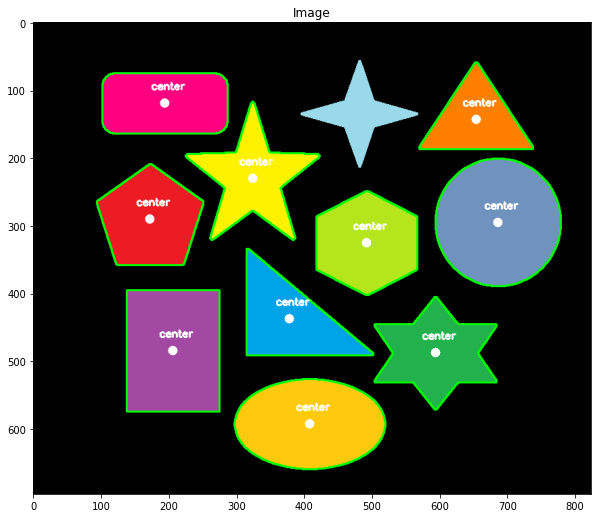

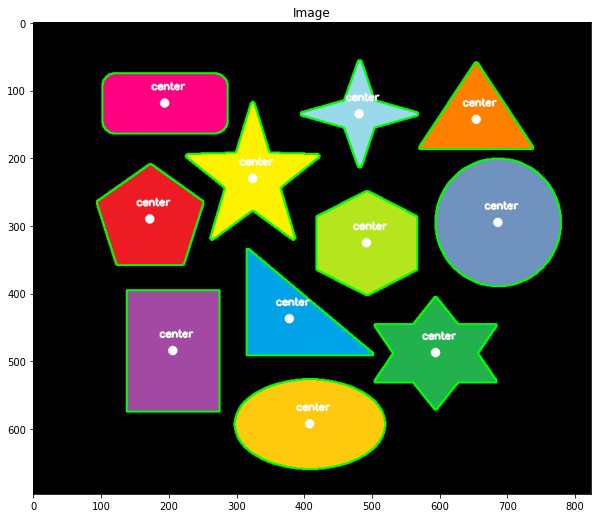

In [8]:
# loop over the contours
# перебираем все контуры
for c in cnts:
	# compute the center of the contour
    # вычисляем центр контура
	M = cv2.moments(c)
	cX = int(M["m10"] / M["m00"])
	cY = int(M["m01"] / M["m00"])

	# draw the contour and center of the shape on the image
    # рисуем контуры и центры фигур на изображении
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
	cv2.circle(image, (cX, cY), 7, (255, 255, 255), -1)
	cv2.putText(image, "center", (cX - 20, cY - 20),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

	# show the image
    # показываем изображения
	plt_imshow("Image", image)